<a href="https://colab.research.google.com/github/bigdata210/Python/blob/main/Python%20basis/peng_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## scikit-learn 불러오기

In [ ]:
import sklearn
sklearn.__version__

'1.2.2'

## 데이터 불러오기

In [ ]:
# x 인자: 종, 서식지, 성별, 부리길이, 부리폭, 날개 길이 -> 체중(target)
import seaborn as sns


df_peng = sns.load_dataset("penguins")        # data 불러오기
df_peng = df_peng.dropna()                    # 결측치 제거

print(f"# shape of dataset: {df_peng.shape}") # shape 확인
display(df_peng.head(3))

# shape of dataset: (333, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


## X,y 분리
- why? 독립변수는 X , 종속변수 y
  + 행렬은 대문자, 벡터는 소문자

In [ ]:
y = df_peng["body_mass_g"]              # y feature 추출
X = df_peng.drop("body_mass_g", axis=1)  # 전체 - y = X
X.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,sex
0,Adelie,Torgersen,39.1,18.7,181.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,Male


## train, test 분리

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8)
print(f"전체 데이터 수 = {X.shape[0]}")
print(f"train set 데이터 수 = {X_train.shape[0]}")
print(f"test set 데이터 수 = {X_test.shape[0]}")

전체 데이터 수 = 333
train set 데이터 수 = 266
test set 데이터 수 = 67


- one-hot encoder 예제
  + get_dummies 비추천! (data가 빠질수도 있음.)

In [ ]:
# 라이브러리 사용
from sklearn.preprocessing import OneHotEncoder

# 예제 데이터 1
data_sample1 = [["Apple"],
                ["Banana"],
                ["Cherry"]]

# 예제 데이터 1 OneHotEncoder 학습 & 변환
ohe = OneHotEncoder()
s_ohe1 = ohe.fit_transform(data_sample1)         # 학습(fit) 후 변환(transform)
print(s_ohe1.toarray())                          # 출력

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [ ]:
# 예제 데이터 2
data_sample2 =[["Banana"]]

# 예제 데이터 2 OneHotEncoder 변환
s_ohe2 = ohe.transform(data_sample2)            # 학습(fit) 후 변환(transform)
print(s_ohe2.toarray())                         # 출력

[[0. 1. 0.]]


- 펭귄 데이터 중 categorical data에 one-hot encoding 적용

In [ ]:
# 펭귄 데이터
cols_category = ["species", "island", "sex"]       # 변환 대상
X_train[cols_category].head(5)                     # 일부 확인

,species,island,sex
73,Adelie,Torgersen,Male
206,Chinstrap,Dream,Female
263,Gentoo,Biscoe,Male
157,Chinstrap,Dream,Female
25,Adelie,Biscoe,Female


In [ ]:
ohe = OneHotEncoder()                                    # one-hot encoder 생성
X_train_ohe = ohe.fit_transform(X_train[cols_category])  # 학습 & 변환
print(X_train_ohe.toarray()[:5])

[[1. 0. 0. 0. 0. 1. 0. 1.]
 [0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0. 1. 0.]]


In [ ]:
# test set을 학습시키면 data leakage 확률이 높다!
X_test_ohe = ohe.transform(X_test[cols_category])        # 학습 없이 변환만 (위의 내용을 적용)
print(X_test_ohe.toarray()[:5])

[[1. 0. 0. 0. 0. 1. 0. 1.]
 [0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 0. 1. 1. 0. 0. 1. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 1. 0.]]


- 펭귄 데이터 중 numerical data에 standard scaler 적용
  + standard scaler <br/>
   : 표준편차는 1, 평균은 0인 data로 변경
   <br/>
  + why? 
    + 선형모델에서 인자간 기여도를 산출할 때
    + 신경망 모델에서 수렴을 돕기 위해 scaling이 필요
    + 트리모델은 필요 없음.

In [ ]:
cols_numerical = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]  # 변환 대상
X_train[cols_numerical].head(5)

,bill_length_mm,bill_depth_mm,flipper_length_mm
73,45.8,18.9,197.0
206,42.5,17.3,187.0
263,49.6,15.0,216.0
157,45.2,17.8,198.0
25,35.3,18.9,187.0


In [ ]:
from sklearn.preprocessing import StandardScaler

stdscaler = StandardScaler()                                    # standard scaler 생성
X_train_std = stdscaler.fit_transform(X_train[cols_numerical])  # 학습 & 변환
print(X_train_std[:5])

[[ 0.39454201  0.8663818  -0.24755437]
 [-0.21412051  0.03365349 -0.97276871]
 [ 1.09542612 -1.16339345  1.13035288]
 [ 0.28387609  0.29388109 -0.17503294]
 [-1.54211146  0.8663818  -0.97276871]]


In [ ]:
X_test_std = stdscaler.transform(X_test[cols_numerical])        # 학습없이 변환
print(X_test_std[:5])

[[ 0.43143064  2.2195653  -0.46511867]
 [-0.21412051 -0.27861962 -0.97276871]
 [ 0.06254427 -1.89203072  0.55018141]
 [ 1.09542612 -0.64293826  1.78304579]
 [-1.46833419 -0.17452858 -1.11781158]]


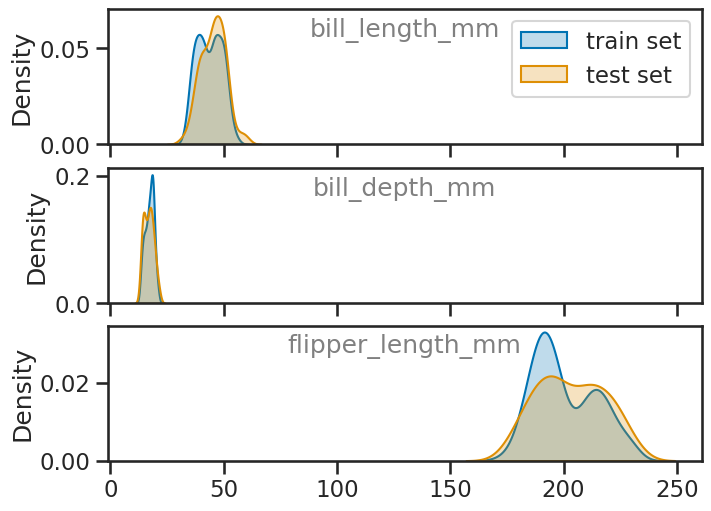

In [ ]:
sns.set_style("ticks")
sns.set_palette("colorblind")
sns.set_context("talk")

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=3, figsize=(7,5), constrained_layout=True, sharex=True)
for ax, col in zip(axs, ["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]):
  sns.kdeplot(x=col, data=X_train, fill=True, ax=ax, label="train set")
  sns.kdeplot(x=col, data=X_test, fill=True, ax=ax, label="test set")
  ax.text(0.5, 0.8, col, ha="center", transform=ax.transAxes, color="gray")
  ax.set_xlabel("")

axs[0].legend()

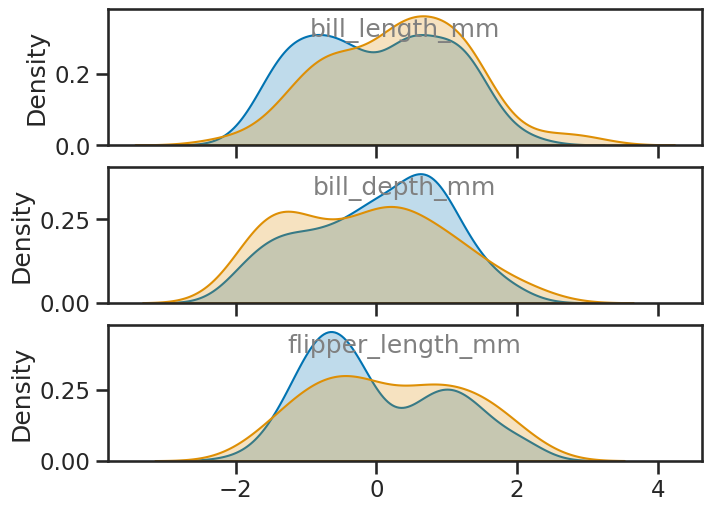

In [ ]:
# 데이터의 평균과 표준편차를 일치시킴.
fig, axs = plt.subplots(nrows=3, figsize=(7,5), constrained_layout=True, sharex=True)
for i, ax in enumerate(axs):
  sns.kdeplot(X_train_std[:,i], fill=True, ax=ax)
  sns.kdeplot(X_test_std[:,i], fill=True, ax=ax)
  ax.text(0.5, 0.8, cols_numerical[i], ha="center", transform=ax.transAxes, color="gray")
  ax.set_xlabel("")

 one-hot encoding을 거친 categorical data
           <br/> + <br/>
 standard scaling 된 numerical data

In [ ]:
# categorical data
X_train_ohe.toarray().shape

(266, 8)

In [ ]:
# numerical data
X_train_std.shape

(266, 3)

In [ ]:
# 두 데이터 결합
import numpy as np

X_train_c = np.concatenate([X_train_ohe.toarray(), X_train_std], axis =1)
X_test_c = np.concatenate([X_test_ohe.toarray(), X_test_std], axis =1)
print(X_train_c.shape)

(266, 11)


## 머신러닝 모델 학습


In [ ]:
# 앙상블 모델의 랜덤포레스트 기법 사용
# 평가 모델은 r2_score 사용
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf = RandomForestRegressor()
rf.fit(X_train_c, y_train)

y_train_pred = rf.predict(X_train_c)     # 학습 X 데이터로 y 예측
y_test_pred = rf.predict(X_test_c)       # 평가 X 데이터로 y 예측

print(f"# R2_train = {r2_score(y_train, y_train_pred):.03f}")   # 학습 데이터 R2
print(f"# R2_val = {r2_score(y_test, y_test_pred):.03f}")       # 평가 데이터 R2

# R2_train = 0.979
# R2_val = 0.871


In [ ]:
# 예측 결과 시각화 (함수)

def plot_parity(X_train, X_val, y_train, y_val, model):
  fig, axs = plt.subplots(ncols=2, figsize=(10,5), constrained_layout=True,
                           sharex=True, sharey=True)
  
  y_train_pred, y_val_pred = model.predict(X_train), model.predict(X_val)
  r2_train, r2_val = r2_score(y_train, y_train_pred), r2_score(y_val, y_val_pred)

  for (ax, y_true, y_pred, c, r2, label) in zip(axs, [y_train, y_val], 
                                                [y_train_pred,y_val_pred],
                                                ["g","m"],
                                                [r2_train, r2_val],
                                                ["train", "validation"]):
    ax.scatter(y_true, y_pred, c=c, label=f"R2={r2:.3f}", alpha=0.5)
    ax.legend(loc="lower right")
    ax.set_xlabel("true")
    ax.set_title(f"{label}", fontsize=20, color="gray", pad=12)

    if ax == axs[0]:
      ax.set_ylabel("predict", labelpad=12)

    ymin = min(y_train.min(), y_val.min())

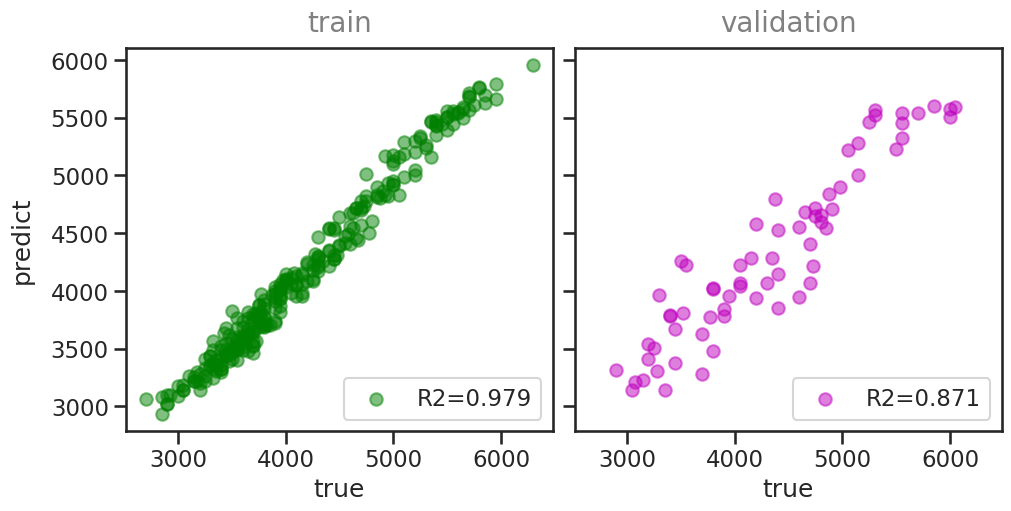

In [ ]:
# 예측 성능 시각화
plot_parity(X_train_c, X_test_c, y_train, y_test, rf)  

- 순열 중요도 (permutation importance)
  + 인자별로 데이터를 뒤섞어 성능 예측
  + 성능이 떨어지게 만든 인자일수록 중요
  

In [ ]:
from sklearn.inspection import permutation_importance

pi = permutation_importance(rf, X_train_c, y_train, n_repeats=30)

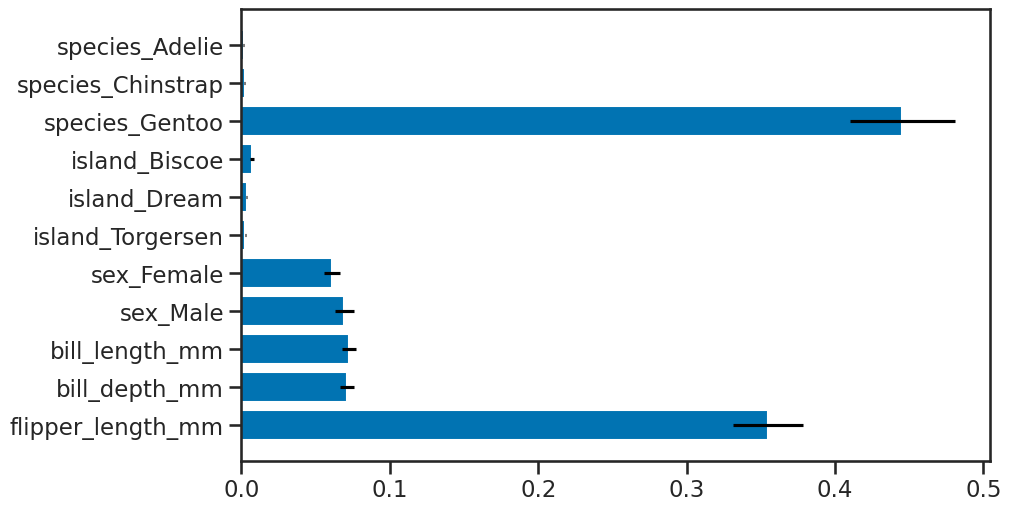

In [ ]:
column_names = ["species_Adelie", "species_Chinstrap", "species_Gentoo",
                "island_Biscoe", "island_Dream", "island_Torgersen",
                "sex_Female", "sex_Male"] + cols_numerical
column_names

fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
ax.barh(column_names, pi.importances_mean, xerr=pi.importances_std)
ax.invert_yaxis()

### species_Gentoo data 와 flipper_length__mm 중요하다!
-but, species_Adelie, species_Chinstrap 는 중요하지 않을까?
- 카테고리를 one-hot encoding으로 변경해서 그렇기 때문에 중요도를 알 수 없다.

In [ ]:
print(X_train_c[:10])

[[ 1.          0.          0.          0.          0.          1.
   0.          1.          0.39454201  0.8663818  -0.24755437]
 [ 0.          1.          0.          0.          1.          0.
   1.          0.         -0.21412051  0.03365349 -0.97276871]
 [ 0.          0.          1.          1.          0.          0.
   0.          1.          1.09542612 -1.16339345  1.13035288]
 [ 0.          1.          0.          0.          1.          0.
   1.          0.          0.28387609  0.29388109 -0.17503294]
 [ 1.          0.          0.          1.          0.          0.
   1.          0.         -1.54211146  0.8663818  -0.97276871]
 [ 1.          0.          0.          0.          1.          0.
   1.          0.         -1.17322509  0.29388109 -0.68268297]
 [ 1.          0.          0.          0.          1.          0.
   1.          0.         -0.76745007 -0.27861962 -1.62546162]
 [ 0.          1.          0.          0.          1.          0.
   1.          0.          0.81

In [ ]:
X_train.iloc[:10]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,sex
73,Adelie,Torgersen,45.8,18.9,197.0,Male
206,Chinstrap,Dream,42.5,17.3,187.0,Female
263,Gentoo,Biscoe,49.6,15.0,216.0,Male
157,Chinstrap,Dream,45.2,17.8,198.0,Female
25,Adelie,Biscoe,35.3,18.9,187.0,Female
84,Adelie,Dream,37.3,17.8,191.0,Female
30,Adelie,Dream,39.5,16.7,178.0,Female
202,Chinstrap,Dream,48.1,16.4,199.0,Female
244,Gentoo,Biscoe,42.9,13.1,215.0,Female
34,Adelie,Dream,36.4,17.0,195.0,Female


## pipeline 구축
- 모델을 만든 후 지속해서 사용할 수 있는 환경을 만드는 것이 중요
- 모듈을 생성하여 계속해서 쓸 수 있도록 만드는 것

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1-1.categorical feature에 one-hot encoding 적용
cat_features = ["species", "island", "sex"]
cat_transformer = OneHotEncoder()

# 1-2.numerical feature는 standard scaler 적용
num_features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]
num_transformer = StandardScaler()

# 2. 인자 종류별 전처리 적용
preprocessor = ColumnTransformer([("cat", cat_transformer, cat_features),
                                  ("num", num_transformer, num_features)])

# 3. 전처리 후 랜덤포레스트 적용
pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                           ("rf", RandomForestRegressor())])

In [ ]:
# pipeline 모듈을 만든 것 확인 할 수 있음.
from sklearn import set_config

set_config(display="diagram")
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['species', 'island', 'sex']),
                                                 ('num', StandardScaler(),
                                                  ['bill_length_mm',
                                                   'bill_depth_mm',
                                                   'flipper_length_mm'])])),
                ('rf', RandomForestRegressor())])

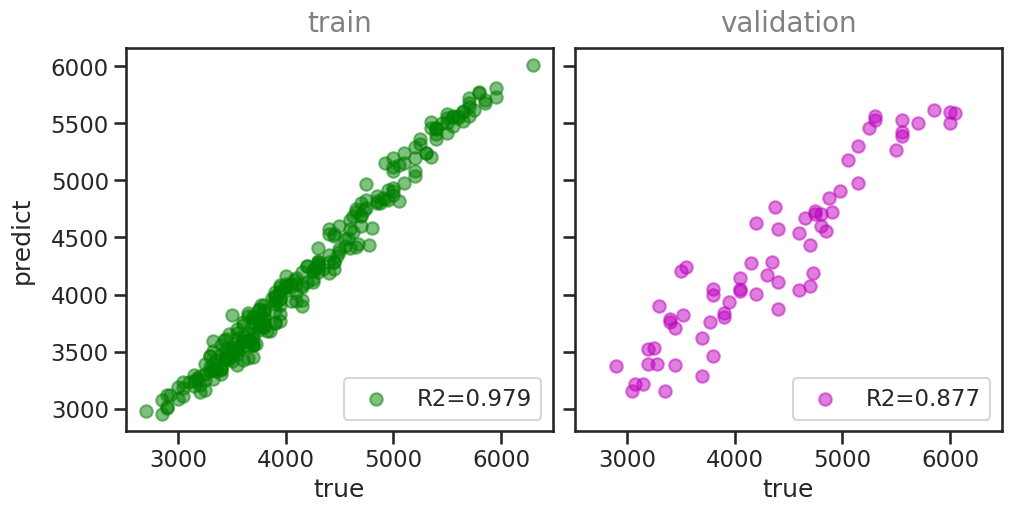

In [ ]:
# pipeline 학습, 성능 평가
plot_parity(X_train, X_test, y_train, y_test, pipeline)

<BarContainer object of 6 artists>

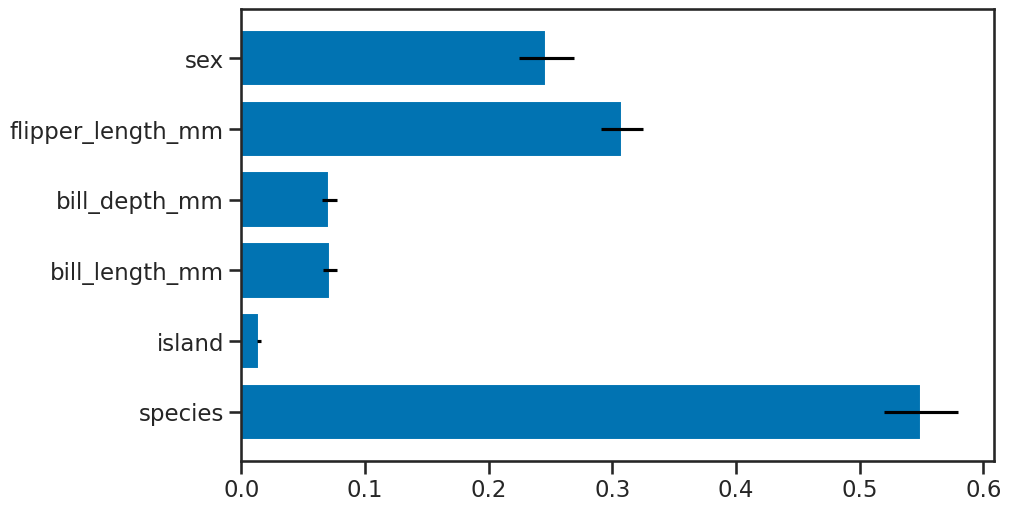

In [ ]:
pi = permutation_importance(pipeline, X_train, y_train, n_repeats=30)

fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
ax.barh(X_train.columns, pi.importances_mean, xerr=pi.importances_std)

### pipeline을 이용하면 one-hot encoding 전의 data형으로 나오기 때문에 중요도를 알 수 있다.
- species가 중요하다는 것을 확인할 수 있음!
- species -> sex -> flipper_length_mm 순으로 중요하다!